# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [42]:
#Import all the necessary modules
import pandas as p
import matplotlib.pyplot as pl
import seaborn as s
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [2]:
pi=p.read_csv('Diabetes.csv',co)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
pi.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [6]:
pi.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
pi.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [8]:
pi=pi.replace(0,pi.median())
pi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [9]:
pi.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [10]:
pi.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

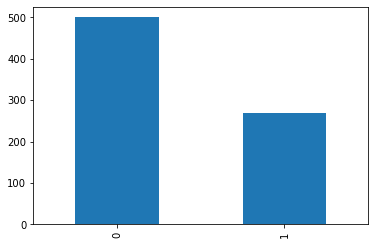

In [12]:
pi['Outcome'].value_counts().plot(kind='bar')
pl.show()

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

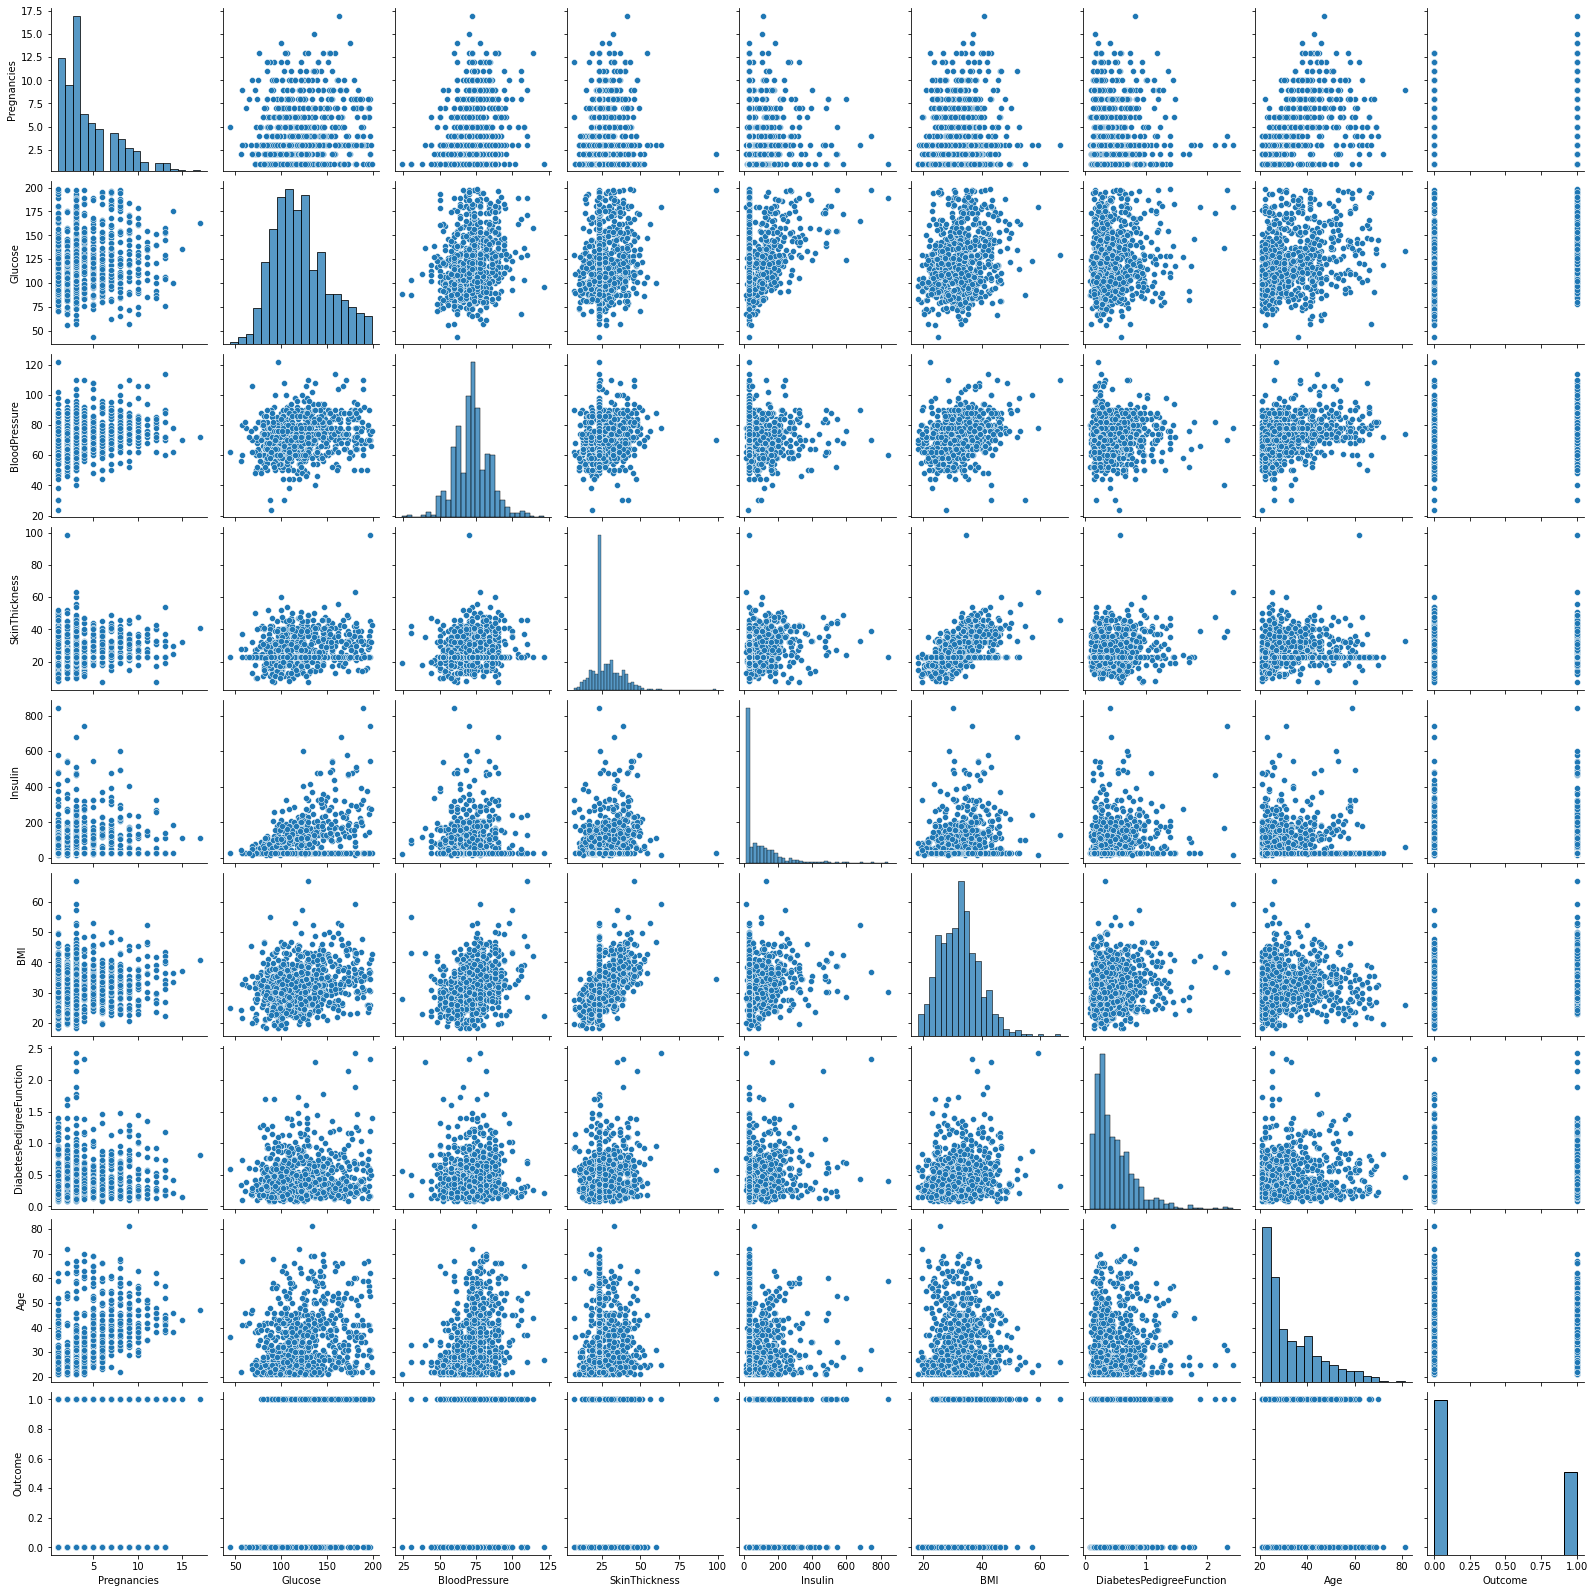

In [15]:
s.pairplot(pi)

In [16]:
pi.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
Glucose,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<AxesSubplot:>

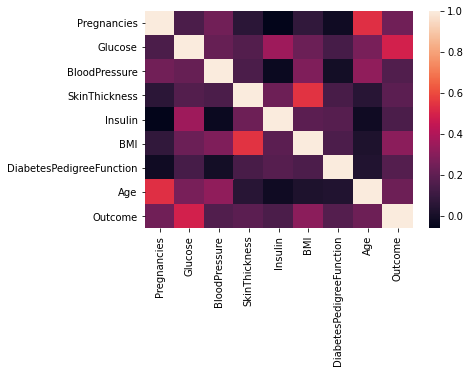

In [17]:
s.heatmap(pi.corr())

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [26]:
x=pi.drop('Outcome',axis=1)
y=pi.Outcome
xt,xte,yt,yte=train_test_split(x,y,test_size=.3)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [28]:
m=DecisionTreeClassifier(criterion='entropy')
m.fit(xt,yt)

DecisionTreeClassifier(criterion='entropy')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [31]:
pr=m.predict(xte)
accuracy_score(yte,pr)

0.683982683982684

In [32]:
confusion_matrix(yte,pr)

array([[114,  40],
       [ 33,  44]], dtype=int64)

Print the feature importance of the decision model - Optional

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [35]:
m=RandomForestClassifier()
m.fit(xt,yt)
pr=m.predict(xte)
accuracy_score(yte,pr)

0.7489177489177489

In [36]:
confusion_matrix(yte,pr)

array([[127,  27],
       [ 31,  46]], dtype=int64)

# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [38]:
m=AdaBoostClassifier()
m.fit(xt,yt)
pr=m.predict(xte)
accuracy_score(yte,pr)

0.7705627705627706

In [39]:
confusion_matrix(yte,pr)

array([[126,  28],
       [ 25,  52]], dtype=int64)

# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [41]:
m=BaggingClassifier()
m.fit(xt,yt)
pr=m.predict(xte)
accuracy_score(yte,pr)

0.7316017316017316

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [43]:
m=GradientBoostingClassifier()
m.fit(xt,yt)
pr=m.predict(xte)
accuracy_score(yte,pr)

0.7705627705627706